In [1]:
import random

from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 6

## Сортировка расческой (comb sort)

### Классификация алгоритма:

- По типу алгоритма: обменная сортировка

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n*log(n))$
  
  - В среднем: $O(n*log(n))$

### Описание алгоритма:
Главный недостаток сортировки пузырьком состоит в низкой скорости выполнения из-за поэлементного повторения перестановки элемента в массиве. В случае, когда самые "большие" элементы массива стоят в начале, алгоритму прийдеться протащить эти элементы перестановками до самого конца.

Сортировка расческой решает проблему пузырьковой сортировки тем, что сравнивает не прилижащие друг к другу элементы, а находящиеся на определенном расстоянии которое может быть больше нуля. Эмперическим путем было доказано, что оптимальным расстянием на котором должны находится сравниваемые элементы равен - длинне массива поделенного на 1.247 и округленного до целого числа.

Алгоритм состоит в следующем:
Узнаем первое расстояние на котором будут сравниватся элементы - длинне массива поделенного на 1.247, затем попарно сравниваем элементы пока не упремся в последний элемент. Далее повторяем алгоритм только с расстоянием - длинне массива поделенного на 1.247^2 и так далее пока не отсорируем массив.

Сортировка расчёской называется так из-за того, что мы как бы расчёсываем массив сначала широким гребнем (большой шаг), потом гребнем поменьше (шаг поменьше). В конце шаг равен единице, как в пузырьковой сортировке.

### Блок-схема алгоритма

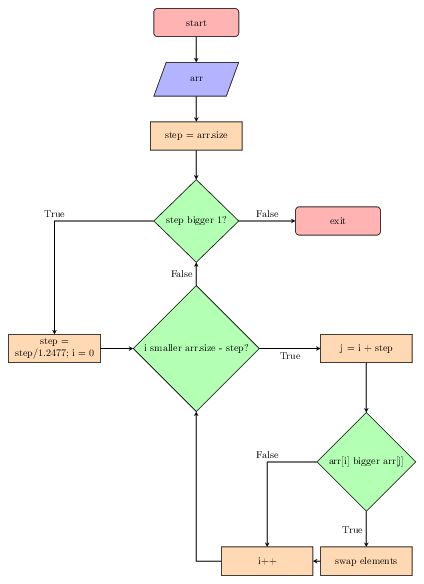

In [7]:
from wand.image import Image as WImage
img = WImage(filename='./img/block_diagram.pdf')
img

### Псевдокод алгоритма

```
int arr_size = arr.size();
int step = arr_size;
while(step > 1){
    step = (int) step/1.247;
    for(int i = 0, i < arr_size - step, i++){
        int j = step + i;
        if(arr[i] > arr[j]){
            swap(arr[i], arr[j]);
        }
    }
}
```

### Реализация алгоритма

Достоинства алгоритма:
    
    -- простота реализации
    -- относительно высокая скорость
    
Недостатки:

    -- заменяется более эффективными сортировками

In [20]:
def comb_sort(elements: List)->List:
    elements_size = len(elements)
    step = elements_size
    while step > 1:
        step = int(step/1.247)
        i = 0
        while i < elements_size - step:
            j = step + i
            if elements[i] > elements[j]:
                    elements[i], elements[j] = elements[j], elements[i]
            i+=1
    return elements

## Ручная трассировка

| step | elements      |
|:-----|:--------------|
| 5    | 5, 1, 3, 4, 2 |
| 4    | 2, 1, 3, 4, 5 |
| 3    | 2, 1, 3, 4, 5 |
| 3    | 2, 1, 3, 4, 5 |
| 2    | 2, 1, 3, 4, 5 |
| 2    | 2, 1, 3, 4, 5 |
| 2    | 2, 1, 3, 4, 5 |
| 1    | 1, 2, 3, 4, 5 |
| 1    | 1, 2, 3, 4, 5 |
| 1    | 1, 2, 3, 4, 5 |
| 1    | 1, 2, 3, 4, 5 |
| 0    | 1, 2, 3, 4, 5 |

In [21]:
### Тестирование программы

sortmethod = comb_sort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [22]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


In [39]:
from datetime import datetime

size_list = [0, 1000, 5000, 10000, 100000]
cpu_times = {
    'sort_array' : [],
    'reverse_array' : [],
    'random_array' : []
}
for size in size_list:
    # for sort_array
    start_time = datetime.now()
    sortmethod(list(get_sort_array(size)))
    cpu_times['sort_array'].append(str(datetime.now() - start_time))

    # for reverse_array
    start_time = datetime.now()
    sortmethod(list(get_reverse_array(size)))
    cpu_times['reverse_array'].append(str(datetime.now() - start_time))

    # for random_array
    start_time = datetime.now()
    sortmethod(list(get_random_array(size)))
    cpu_times['random_array'].append(str(datetime.now() - start_time))

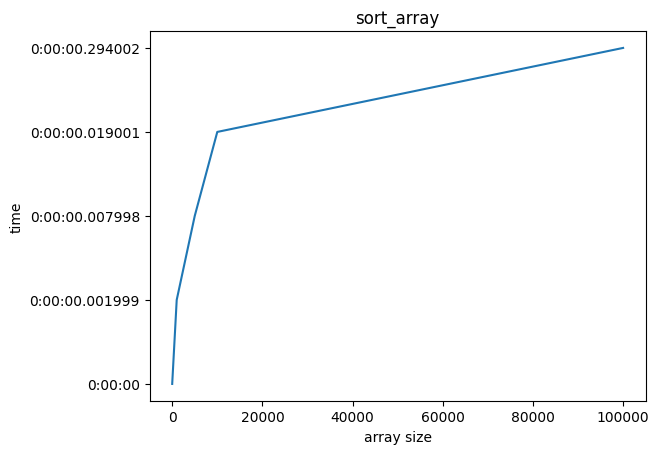

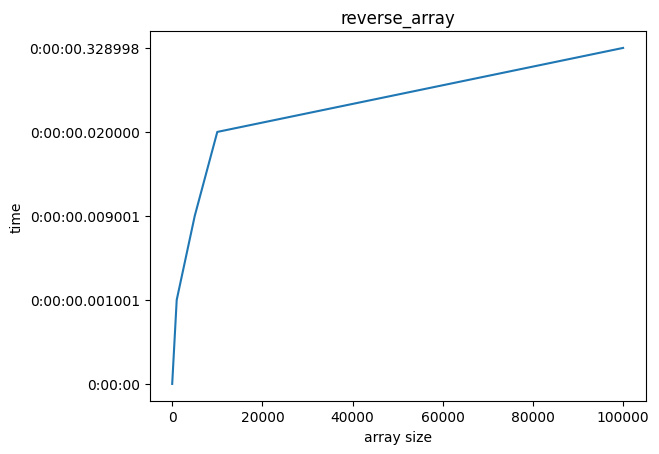

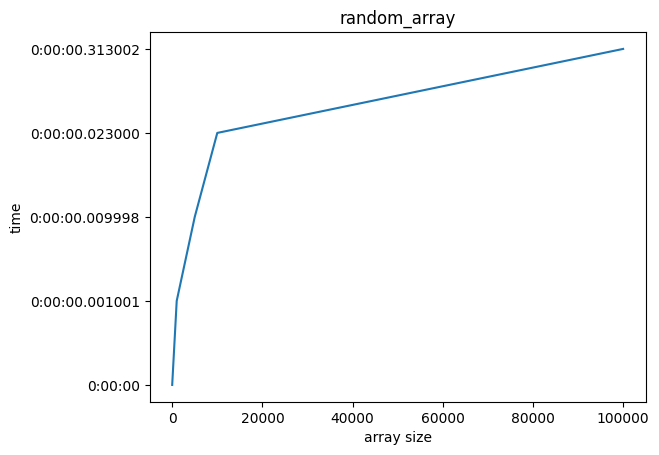

In [40]:
from matplotlib import pyplot

for key in cpu_times:
    pyplot.plot(size_list, cpu_times[key])
    pyplot.title(key)
    pyplot.xlabel('array size')
    pyplot.ylabel('time')
    pyplot.show()
pyplot.show()

### Литература

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.

https://ru.overleaf.com/learn/latex/LaTeX_Graphics_using_TikZ%3A_A_Tutorial_for_Beginners_(Part_3)%E2%80%94Creating_Flowcharts

https://www.ctan.org/pkg/nassflow